In [21]:
import torch
from src.dataset import test_dataset

from src.model import UNET
from src.utils import display_images

model = UNET(channels=[3, 64, 128, 256, 512, 1024], out_channels=1)
model.load_state_dict(torch.load("mymodel.pth", map_location=torch.device("cpu")))
img, mask = test_dataset[345]

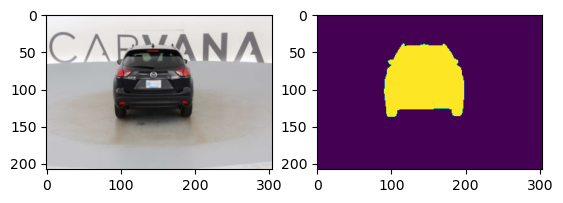

In [22]:
display_images(img,mask)

tensor([[[[-3.7213, -4.1615, -4.4753,  ..., -4.2075, -3.7729, -3.6788],
          [-4.5520, -4.5627, -4.5397,  ..., -4.4977, -4.2874, -4.2578],
          [-4.5421, -4.5275, -4.5558,  ..., -4.7292, -4.7781, -4.7274],
          ...,
          [-4.3948, -4.3060, -4.5909,  ..., -4.3630, -4.4315, -4.6070],
          [-4.2472, -4.7485, -4.6330,  ..., -4.7501, -4.6814, -4.6743],
          [-4.2522, -4.8009, -4.9086,  ..., -4.7989, -4.5299, -4.1646]]]],
       grad_fn=<ConvolutionBackward0>)
torch.Size([3, 208, 304])
torch.Size([1, 208, 304])


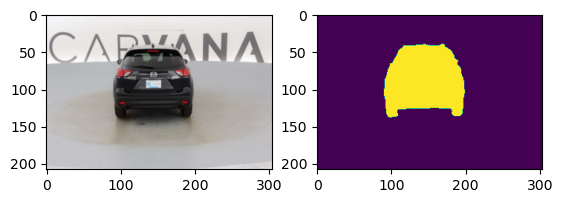

tensor(1.)

In [23]:
model.eval()

preds = model(torch.unsqueeze(img, 0))
print(preds)
preds = (torch.sigmoid(preds)>0.5).float()
print(img.shape)
print(preds[0,:,:,:].shape)
display_images(img, preds[0,:,:,:])
torch.max(mask)

In [24]:
import matplotlib.pyplot as plt

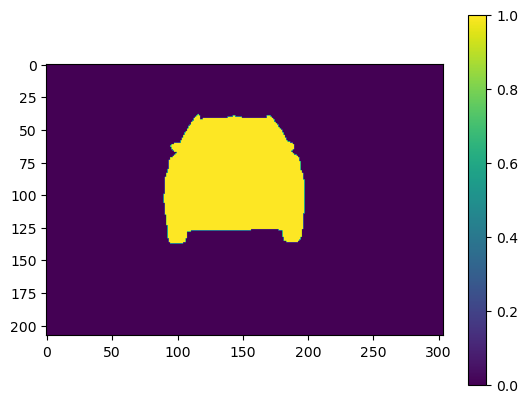

In [25]:
plt.imshow(mask[0,:,:])
plt.colorbar()
plt.show()